In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

print(f'tensorflow version: {tf.__version__}')

tensorflow version: 2.4.1


### The diabetes dataset uses data from 442 diabetic patients with variables such as age, sex, bmi, blood pressure, and six blood serum measurements - all of which have been mean centered (labeled as 'data' below). The target variable is the quantitative measure of the disease progression one year after the baseline measurements

In [2]:
# load/prepare data

diabetes_dataset = load_diabetes()

data = diabetes_dataset['data']
targets = diabetes_dataset['target']
# normalize target data to improve training curves
targets = (targets - targets.mean(axis=0)) / targets.std()

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=.1)

### Two models are built below, first one without regularization techniques, and second with regularization to show the difference in model performance

## No regularization

In [3]:
def build_plain_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(train_data.shape[1],)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    return model

In [4]:
plain_model = build_plain_model()

# compile and build model with validation portion
plain_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_plain = plain_model.fit(train_data, train_targets, epochs=100, validation_split=.15,
                                batch_size=64, verbose=False)

In [5]:
plain_model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.6227 - mae: 0.6243


[0.6226579546928406, 0.6243478059768677]

### Our training loss is improving after each epoch, while our validation loss is increasing - aka this model is massively overfitting!

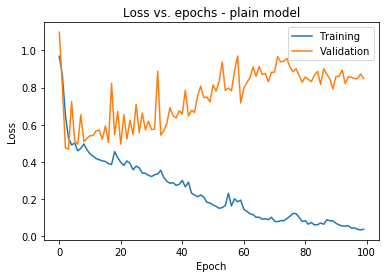

In [6]:
plt.plot(history_plain.history['loss'])
plt.plot(history_plain.history['val_loss'])
plt.title('Loss vs. epochs - plain model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

### Regularization - introducing dropout, weight decay, and earlystopping - bang!
- dropout: sets input units to 0 at a frequency of the dropout_out rate, which means eaach weight connection between dense layers is set to 0 with probability of dropout_rate
- weight decay ('l2 regularization'):  used to constrain a neural network's connection weights
- early stopping: stops training as soon as performance worsens n number of times (patience paramater) consecutively from one epoch to the next. 

In [7]:
# same model as before, but with the updated techniques above

def build_regularized_model(weight_decay, dropout_rate):
    model = Sequential([
        Dense(128, kernel_regularizer=regularizers.l2(weight_decay), activation='relu', 
              input_shape=(train_data.shape[1],)),
        Dropout(dropout_rate),
        Dense(128, kernel_regularizer=regularizers.l2(weight_decay), activation="relu"),
        Dropout(dropout_rate),
        Dense(128, kernel_regularizer=regularizers.l2(weight_decay), activation="relu"),
        Dropout(dropout_rate),
        Dense(128, kernel_regularizer=regularizers.l2(weight_decay), activation="relu"),
        Dropout(dropout_rate),
        Dense(128, kernel_regularizer=regularizers.l2(weight_decay), activation="relu"),
        Dropout(dropout_rate),
        Dense(128, kernel_regularizer=regularizers.l2(weight_decay), activation="relu"),
        Dropout(dropout_rate),
        Dense(1)
    ])
    
    return model

In [8]:
reg_model = build_regularized_model(weight_decay=1e-8, dropout_rate=.2)
reg_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_reg = reg_model.fit(train_data, train_targets, epochs=100, validation_split=.15, 
                           batch_size=64, verbose=False,
                           callbacks=[tf.keras.callbacks.EarlyStopping(patience=20)])

In [9]:
reg_model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.4487 - mae: 0.5338


[0.4486682116985321, 0.5338379144668579]

### Much better, in less epochs!

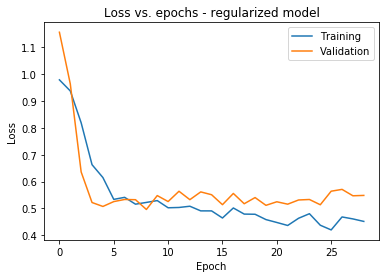

In [10]:
plt.plot(history_reg.history['loss'])
plt.plot(history_reg.history['val_loss'])
plt.title('Loss vs. epochs - regularized model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

Can run more epochs to improve performance - this is to demonstrate three regularization techniques and the effect it can have on performance